In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import urllib.request as urllib2
%matplotlib inline

from scipy.cluster.vq import kmeans,vq
from scipy.cluster.vq import whiten
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from webcolors import rgb_to_name

In [ ]:
f = "monet1.jpeg"

Shape: (453, 600, 3)
New shape : (500, 662, 3)


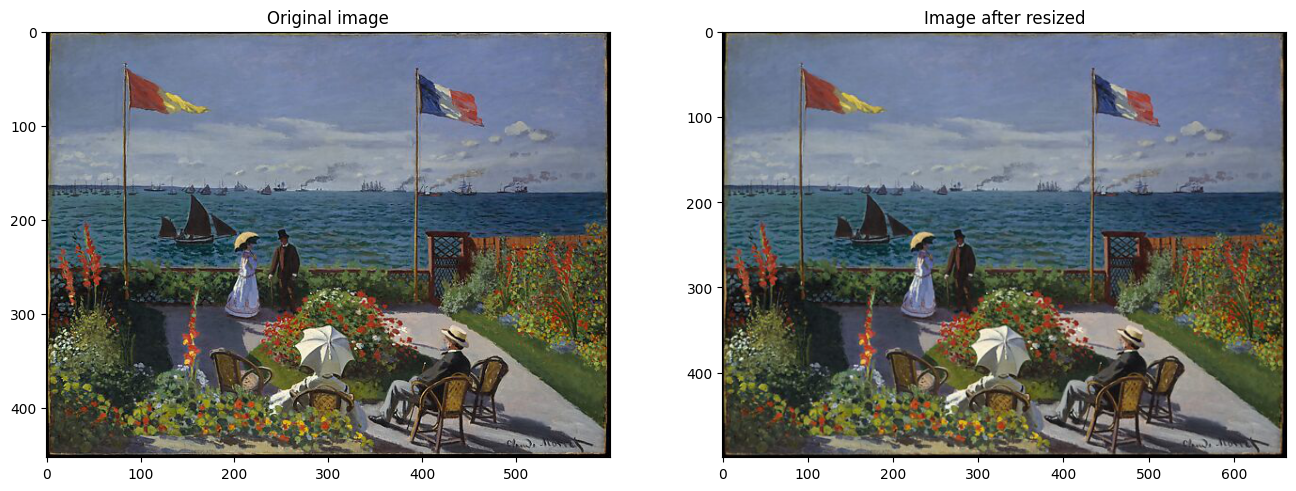

In [ ]:
# read the image file and present
image = img.imread(f)
print('Shape:', image.shape)
w, h = image.shape[:2]

# resize the image to width = 500
# then portionally resize the height
rs_w = 500
rs_image = cv2.resize(image, (int(rs_w*float(h)/w), rs_w))


# show original image and resized image
print('New shape :', rs_image.shape)

plt.figure(figsize=(16,10))
plt.axis("off")

plt.subplot(121)
plt.title('Original image')
plt.imshow(image)

plt.subplot(122)
plt.title('Image after resized')
plt.imshow(rs_image)
plt.show()

In [ ]:
# create empty list for each color elements: red, green, blue
r,g,b=[],[],[]

# iterate through each pixel, store their rgb values in each color lists
for pixel in rs_image:
    for r_val, g_val, b_val in pixel:
        r.append(r_val)
        g.append(g_val)
        b.append(b_val)

# normalize rgb values in lists
nor_red = whiten(r)
nor_blue = whiten(b)
nor_green = whiten(g)

In [ ]:

df = pd.DataFrame({'red':r,'blue':b,'green':g,'scaled_red':nor_red,'scaled_blue':nor_blue,
                   'scaled_green':nor_green})
df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,0,15,11,0.000000,0.281006,0.264310
1,0,28,1,0.000000,0.524544,0.024028
2,9,45,4,0.213076,0.843017,0.096113
3,9,25,2,0.213076,0.468343,0.048056
4,9,5,0,0.213076,0.093669,0.000000


In [ ]:
# use elbow plot to find the proper number for centroids/clusters
distortions = []
num_clusters = range(1, 10)

for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

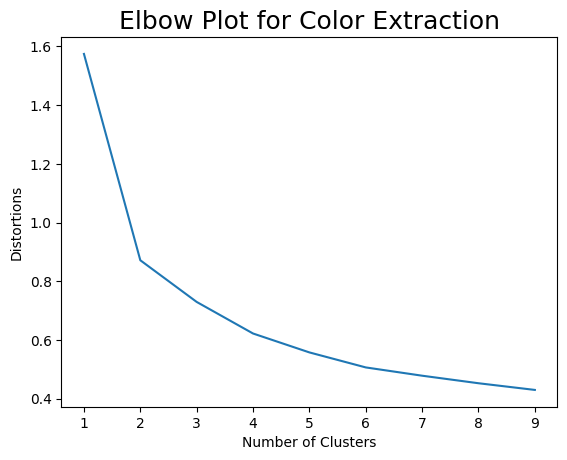

In [ ]:
plt.plot(num_clusters, distortions)
plt.xticks(num_clusters)
plt.title('Elbow Plot for Color Extraction', size=18)
plt.xlabel('Number of Clusters')
plt.ylabel("Distortions")
plt.show()

In [ ]:
# flatten pixel list
pixels = rs_image.reshape((-1, 3))

In [ ]:
# deploy kmeans to pixels 
n_clusters = 5
color_k_means= KMeans(n_clusters)
color_k_means.fit(pixels)

# centroids value
print(color_k_means.cluster_centers_)

# the rgb values of centroids
centroids_colors = np.asarray(color_k_means.cluster_centers_, dtype='uint8')
print(centroids_colors)

[[104.0383648   92.1493247   56.67297754]
 [155.20282232 159.00484779 160.37887382]
 [ 61.8169263   82.78003097  96.62381343]
 [ 42.54220274  43.67743532  35.69817616]
 [114.63487436 126.38685079 150.94517876]]
[[104  92  56]
 [155 159 160]
 [ 61  82  96]
 [ 42  43  35]
 [114 126 150]]


In [ ]:
color_hex = []
for val in centroids_colors:
  hex_val = '#{:02x}{:02x}{:02x}'.format(val[0], val[1], val[2])
  color_hex.append(hex_val)
print(color_hex)

['#685c38', '#9b9fa0', '#3d5260', '#2a2b23', '#727e96']


Original Image --->


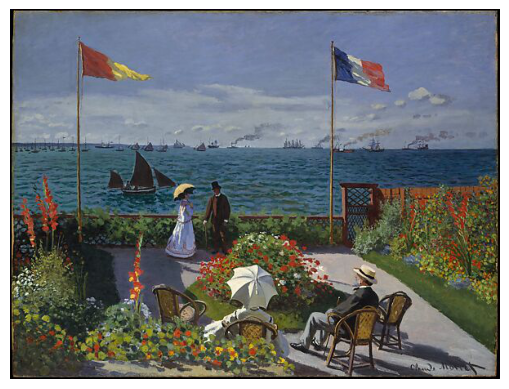

Dominant5Colours of Image --->


[Text(0, 0, '#685c38'),
 Text(1, 0, '#9b9fa0'),
 Text(2, 0, '#3d5260'),
 Text(3, 0, '#2a2b23'),
 Text(4, 0, '#727e96')]

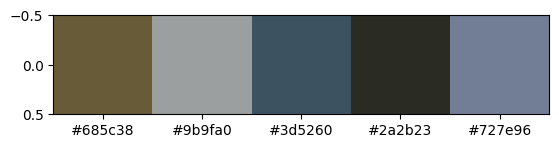

In [ ]:
# show the dominant colors

print("Original Image --->")
plt.axis('off')
plt.imshow(image)
plt.show()

print("Dominant"+str(n_clusters)+"Colours of Image --->")
# plt.axis('off')
# plt.imshow([centroids_colors])
# plt.set_xticklabels(color_hex)
# plt.show()
fig, ax = plt.subplots(1,1)

img = ax.imshow([centroids_colors])

x_label_list = color_hex

ax.set_xticks(range(n_clusters))

ax.set_xticklabels(x_label_list)

Percentage:  [0.175 0.154 0.166 0.214 0.291]


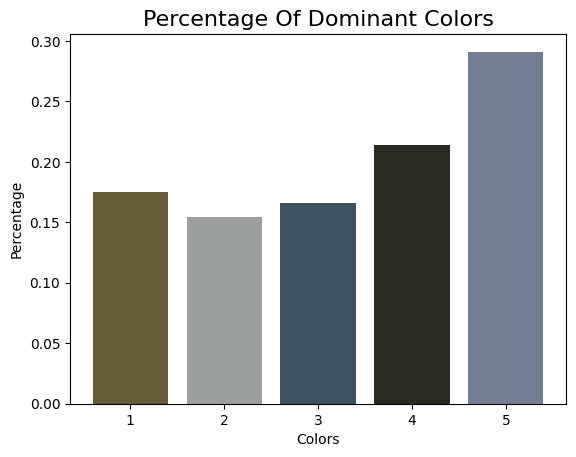

In [ ]:
# count how many pixels grouped in each color centroids
pixels_num = np.unique(color_k_means.labels_, return_counts=True)[1]
# calculate the percentage of each dominant colors 
percentage = pixels_num/pixels.shape[0]
# round to 2 decimal
percentage = np.around(percentage, decimals = 3)

# plot the percentage of dominant colors

#def addlabels(x,y):
#    for i in range(len(x)):
#        plt.text(i,y[i],y[i])
print("Percentage: ",percentage)
plt.title('Percentage Of Dominant Colors', size=16)
plt.bar(range(1,n_clusters+1), percentage, color=np.array(centroids_colors)/255)
#addlabels(range(1,n_clusters+1), percentage)
plt.ylabel('Percentage')
plt.xlabel('Colors')
plt.show()

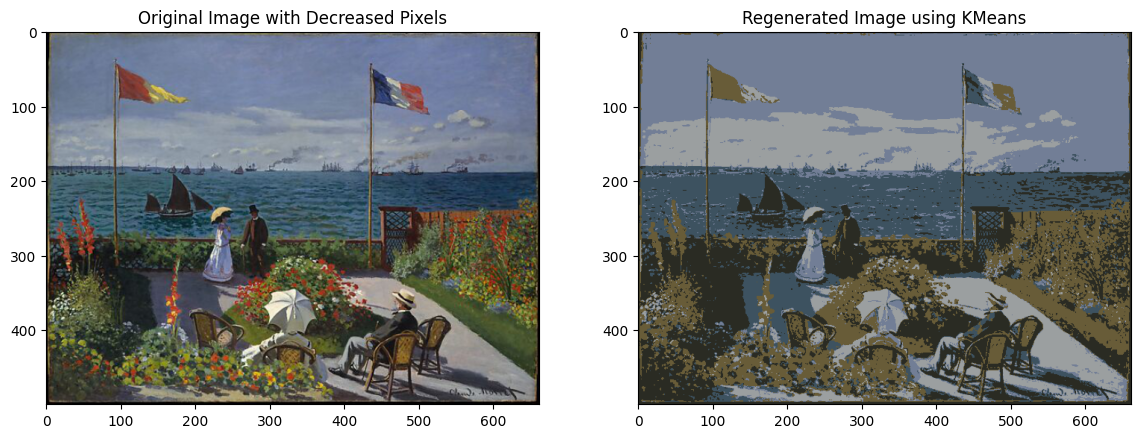

In [ ]:
p=pixels.copy()

# replace each pixel color values with its centroids
for px in range(pixels.shape[0]):
    for _ in range(centroids_colors.shape[0]):
        p[px]=centroids_colors[color_k_means.labels_[px]]

# generate new image only with dominant colors
img = p.reshape(rs_w, -1, 3)
cv2.imwrite("regenrated_img.png",img)

plt.figure(figsize=(14,10))
plt.subplot(121)
plt.title('Original Image with Decreased Pixels')
plt.imshow(rs_image)

plt.subplot(122)
plt.title('Regenerated Image using KMeans')
plt.imshow(img)
plt.show()